<a href="https://colab.research.google.com/github/Pnwankwo2/M92/blob/larry/Project_1_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install and import the required libraries and dependencies

In [750]:
# Install the required libraries
! pip install Prophet

In [751]:

# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [752]:
df = pd.read_csv("https://stats.bis.org/api/v2/data/dataflow/BIS/WS_EER/1.0/D.N.B.US?format=csv",
    index_col='TIME_PERIOD',
    parse_dates=True
)
df

,FREQ,EER_TYPE,EER_BASKET,REF_AREA,UNIT_MEASURE,TIME_FORMAT,COLLECTION,TITLE_TS,OBS_VALUE,OBS_STATUS,OBS_CONF,OBS_PRE_BREAK
TIME_PERIOD,,,,,,,,,,,,
1996-04-11,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),77.43,A,F,NaN
1996-04-12,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),77.37,A,F,NaN
1996-04-13,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),NaN,H,F,NaN
1996-04-14,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),NaN,H,F,NaN
1996-04-15,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),77.49,A,F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-27,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),104.23,A,F,NaN
2024-09-28,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),NaN,H,F,NaN
2024-09-29,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),NaN,H,F,NaN


In [753]:
# The correct encoding must be used to read the CSV
df = pd.read_csv("https://stats.bis.org/api/v2/data/dataflow/BIS/WS_EER/1.0/D.N.B.US?format=csv", encoding="ISO-8859-1")

In [754]:
df.shape

(10401, 13)

In [755]:
#. review the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10401 entries, 0 to 10400
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FREQ           10401 non-null  object 
 1   EER_TYPE       10401 non-null  object 
 2   EER_BASKET     10401 non-null  object 
 3   REF_AREA       10401 non-null  object 
 4   UNIT_MEASURE   10401 non-null  int64  
 5   TIME_FORMAT    0 non-null      float64
 6   COLLECTION     10401 non-null  object 
 7   TITLE_TS       10401 non-null  object 
 8   TIME_PERIOD    10401 non-null  object 
 9   OBS_VALUE      7429 non-null   float64
 10  OBS_STATUS     10401 non-null  object 
 11  OBS_CONF       10401 non-null  object 
 12  OBS_PRE_BREAK  0 non-null      float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


In [756]:
# Orgainze DataFram for only the Index (TIME_PERIOD) and Exchange Rate (OBS_VALUE)

df_filtered_columns = [['OBS_VALUE']]


#Drop unwanted rows
df_filtered_columns = df.dropna()


#rename columns
df_renamed = df_filtered_rows.rename(columns={'OBS_VALUE':'Exchange_Rate'},index={'TIME_PERIOD':'Date'})
df_renamed.index.main_name = 'Date'

# Check info and Datatypes
display(df_renamed.info())

df_renamed.dtypes

display(df_renamed.head())
display(df_renamed.tail())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7429 entries, 1996-04-11 to 2024-10-01
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Exchange_Rate  7429 non-null   float64
dtypes: float64(1)
memory usage: 116.1 KB


None

,Exchange_Rate
TIME_PERIOD,
1996-04-11,77.43
1996-04-12,77.37
1996-04-15,77.49
1996-04-16,77.41
1996-04-17,77.40


,Exchange_Rate
TIME_PERIOD,
2024-09-25,104.29
2024-09-26,104.36
2024-09-27,104.23
2024-09-30,104.22
2024-10-01,104.70


In [757]:
# Use this copy for the Prophet Model
df_copy = df_renamed.copy()

display(df_copy.head())
display(df_copy.tail())


,Exchange_Rate
TIME_PERIOD,
1996-04-11,77.43
1996-04-12,77.37
1996-04-15,77.49
1996-04-16,77.41
1996-04-17,77.40


,Exchange_Rate
TIME_PERIOD,
2024-09-25,104.29
2024-09-26,104.36
2024-09-27,104.23
2024-09-30,104.22
2024-10-01,104.70


In [758]:
# Apply Statistical Analysis

# Calculate the count, minimum value and maximum value of the exchange rate column
print("Exchange_Rate:")
print(f"The count is {df_renamed['Exchange_Rate'].count()}")
print(f"The minimum is {df_renamed['Exchange_Rate'].min()}")
print(f"The maximum is {df_renamed['Exchange_Rate'].max()}")

# Calculate the measure of central tendency

mean_numpy = np.mean(df_renamed['Exchange_Rate'])
print(f"The mean exchange rate is {mean_numpy}")

median_numpy = np.median(df_renamed['Exchange_Rate'])
print(f"The median exchange rate is {median_numpy}")

mode_scipy = stats.mode(df_renamed['Exchange_Rate'])
print(f"The mode exchange rate is {mode_scipy}")

print(f"The mean is {df_renamed['Exchange_Rate'].mean()}")

# Calculate variance and standard deviation using NumPy

std_numpy = np.std(df_renamed['Exchange_Rate'])
print(f"The standard deviation of the exchange rate is {std_numpy}")

variance_numpy = np.var(df_renamed['Exchange_Rate'])
print(f"The variance of the exchange rate is {variance_numpy}")

# Use pandas to find potential outliers by calculating the interquartile range (IQR)
Q1 = df_renamed['Exchange_Rate'].quantile(0.25)
median = df_renamed['Exchange_Rate'].quantile(0.5)
Q3 = df_renamed['Exchange_Rate'].quantile(0.75)
IQR = Q3 - Q1

print(f"The lower quartile of Exchange Rate is: {Q1}")
print(f"The upper quartile of Exchange Rate is: {Q3}")
print(f"The interquartile range of Exchange Rate is: {IQR}")


lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Exchange_Rate:
The count is 7429
The minimum is 73.92
The maximum is 110.37
The mean exchange rate is 90.55257369767129
The median exchange rate is 91.62
The mode exchange rate is ModeResult(mode=78.12, count=13)
The mean is 90.55257369767129
The standard deviation of the exchange rate is 8.790205513040572
The variance of the exchange rate is 77.26771296148887
The lower quartile of Exchange Rate is: 81.76
The upper quartile of Exchange Rate is: 97.7
The interquartile range of Exchange Rate is: 15.939999999999998
Values below 57.85000000000001 could be outliers.
Values above 121.61 could be outliers.


In [759]:
# Calculate z-scores using SciPy (z-score: how many standard deviations away from the mean the corresponding exhcange rate value is)

zscore = st.zscore(df_renamed['Exchange_Rate'])
print(f"The z-score of the exchange rate is {zscore_scipy}")



The z-score of the exchange rate is TIME_PERIOD
1996-04-11   -1.492863
1996-04-12   -1.499689
1996-04-15   -1.486037
1996-04-16   -1.495138
1996-04-17   -1.496276
                ...   
2024-09-25    1.562811
2024-09-26    1.570774
2024-09-27    1.555985
2024-09-30    1.554847
2024-10-01    1.609453
Name: Exchange_Rate, Length: 7429, dtype: float64


In [760]:
# add the mean, median, mode, variance, standard deviation, and z-scores to the DataFrame as new columns
# mean = average, median = middle value, mode = most frequent appearing exchange rate
# variance = how far exchange rates are from the mean, SD = square root of variance and is average disatance of each exchange rate from the mean
# higher SD indicates greater dispersion in the exchange rates

df_renamed.loc[:, 'mean'] = mean_numpy
df_renamed.loc[:, 'Median'] = median_numpy
df_renamed.loc[:, 'Variance'] = variance_numpy
df_renamed.loc[:, 'Standard_Deviation'] = std_numpy
df_renamed.loc[:, 'z_score'] = (df_renamed['Exchange_Rate'] - mean_numpy) / std_numpy

# Display the first and last five rows
display(df_renamed.head())
display(df_renamed.tail())

,Exchange_Rate,mean,Median,Variance,Standard_Deviation,z_score
TIME_PERIOD,,,,,,
1996-04-11,77.43,90.552574,91.62,77.267713,8.790206,-1.492863
1996-04-12,77.37,90.552574,91.62,77.267713,8.790206,-1.499689
1996-04-15,77.49,90.552574,91.62,77.267713,8.790206,-1.486037
1996-04-16,77.41,90.552574,91.62,77.267713,8.790206,-1.495138
1996-04-17,77.40,90.552574,91.62,77.267713,8.790206,-1.496276


,Exchange_Rate,mean,Median,Variance,Standard_Deviation,z_score
TIME_PERIOD,,,,,,
2024-09-25,104.29,90.552574,91.62,77.267713,8.790206,1.562811
2024-09-26,104.36,90.552574,91.62,77.267713,8.790206,1.570774
2024-09-27,104.23,90.552574,91.62,77.267713,8.790206,1.555985
2024-09-30,104.22,90.552574,91.62,77.267713,8.790206,1.554847
2024-10-01,104.70,90.552574,91.62,77.267713,8.790206,1.609453


## **Mine the Search Traffic Data for Seasonality**

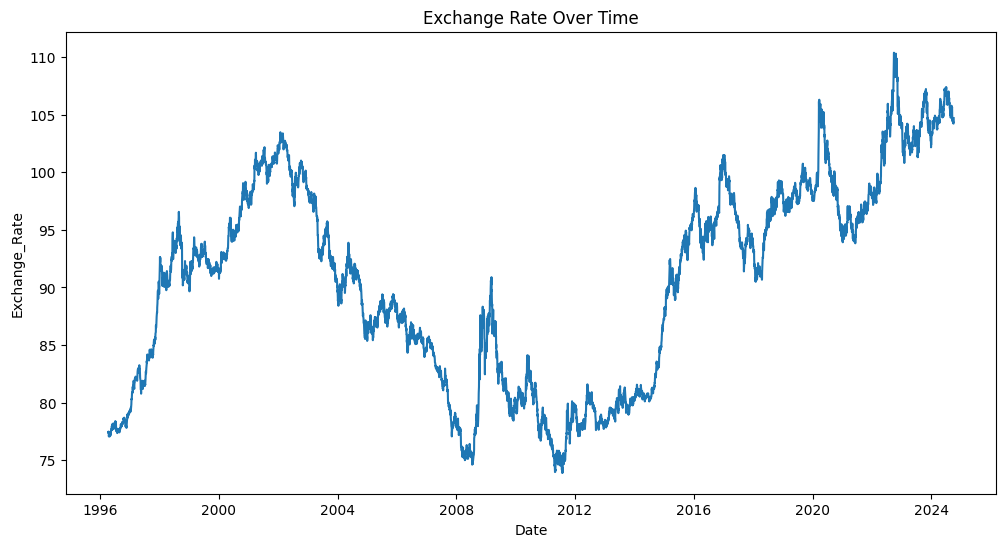

In [761]:
# Plotting the Exchange Rate over time
plt.figure(figsize=(12,6))
plt.plot(df_renamed['Exchange_Rate'])
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange_Rate')
plt.show()

In [762]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
correlation_table = df_renamed[["Variance", "Exchange_Rate"]].corr()
print(correlation_table)

               Variance  Exchange_Rate
Variance            NaN            NaN
Exchange_Rate       NaN            1.0


In [763]:
# Using the df_copy DataFrame, reset the index so the date information is no longer the index
prophet_df = df_copy.reset_index()


# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df.columns = ['ds', 'y']
prophet_df.head()


# Drop an NaN values from the prophet_df DataFrame
prophet_df = prophet_df.dropna()


# View the first and last five rows of the prophet_df DataFrame
display(prophet_df.head())
display(prophet_df.tail())

,ds,y
0,1996-04-11,77.43
1,1996-04-12,77.37
2,1996-04-15,77.49
3,1996-04-16,77.41
4,1996-04-17,77.40


,ds,y
7424,2024-09-25,104.29
7425,2024-09-26,104.36
7426,2024-09-27,104.23
7427,2024-09-30,104.22
7428,2024-10-01,104.70


In [764]:
# Call the Prophet function, store as an object
model = Prophet()


In [765]:
# Fit the time-series model.
model.fit(prophet_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqw377rry/q3ccdexp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqw377rry/h5hulos6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45179', 'data', 'file=/tmp/tmpqw377rry/q3ccdexp.json', 'init=/tmp/tmpqw377rry/h5hulos6.json', 'output', 'file=/tmp/tmpqw377rry/prophet_modelzmrnrce_/prophet_model-20241003230359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:04:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:04:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [766]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future = model.make_future_dataframe(periods=3, freq='Y')

# View the last five rows of the future DataFrame
future.tail()


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


,ds
7427,2024-09-30
7428,2024-10-01
7429,2024-12-31
7430,2025-12-31
7431,2026-12-31


In [767]:
# Make the predictions for the trend data using the mercado_trends DataFrame
forecast = model.predict(future)

# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast.head())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-11,76.566980,73.878879,78.846640,76.566980,76.566980,-0.163952,-0.163952,-0.163952,-0.120922,-0.120922,-0.120922,-0.043030,-0.043030,-0.043030,0.0,0.0,0.0,76.403028
1,1996-04-12,76.579177,74.147583,78.974487,76.579177,76.579177,-0.163599,-0.163599,-0.163599,-0.111210,-0.111210,-0.111210,-0.052389,-0.052389,-0.052389,0.0,0.0,0.0,76.415578
2,1996-04-15,76.615766,74.037938,78.989585,76.615766,76.615766,-0.192368,-0.192368,-0.192368,-0.110872,-0.110872,-0.110872,-0.081496,-0.081496,-0.081496,0.0,0.0,0.0,76.423398
3,1996-04-16,76.627963,74.028309,78.851248,76.627963,76.627963,-0.203423,-0.203423,-0.203423,-0.112082,-0.112082,-0.112082,-0.091342,-0.091342,-0.091342,0.0,0.0,0.0,76.424539
4,1996-04-17,76.640159,74.052045,78.762464,76.640159,76.640159,-0.211530,-0.211530,-0.211530,-0.110415,-0.110415,-0.110415,-0.101115,-0.101115,-0.101115,0.0,0.0,0.0,76.428629


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


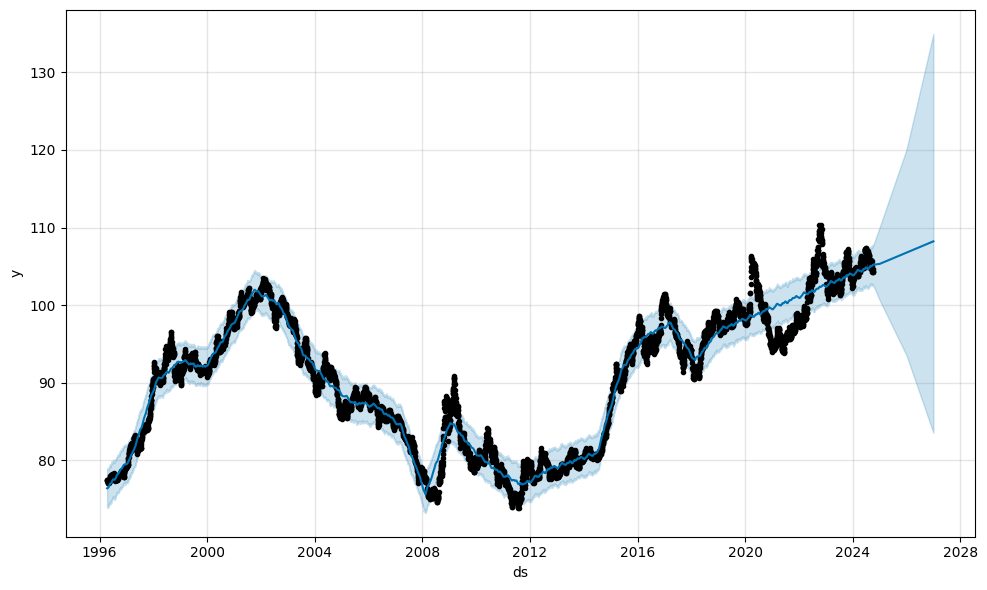

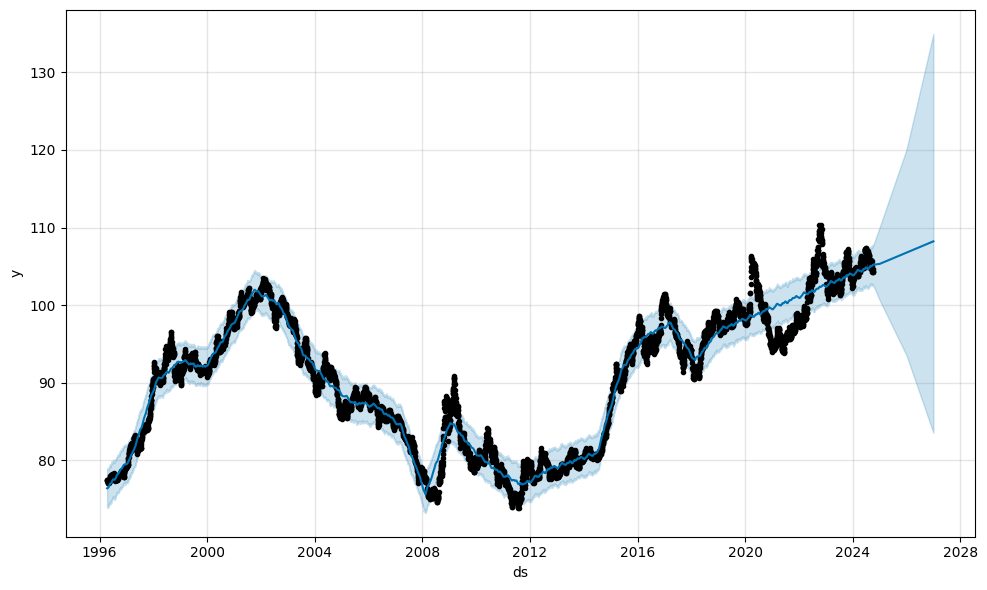

In [768]:
# Plot the Prophet predictions for the Mercado trends data
model.plot(forecast)

In [769]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast = forecast.set_index('ds')


# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast[['yhat', 'yhat_lower', 'yhat_upper']]



,yhat,yhat_lower,yhat_upper
ds,,,
1996-04-11,76.403028,73.878879,78.846640
1996-04-12,76.415578,74.147583,78.974487
1996-04-15,76.423398,74.037938,78.989585
1996-04-16,76.424539,74.028309,78.851248
1996-04-17,76.428629,74.052045,78.762464
...,...,...,...
2024-09-30,105.187445,102.758777,107.770325
2024-10-01,105.200066,102.668618,107.598317
2024-12-31,105.308013,100.649952,110.014172


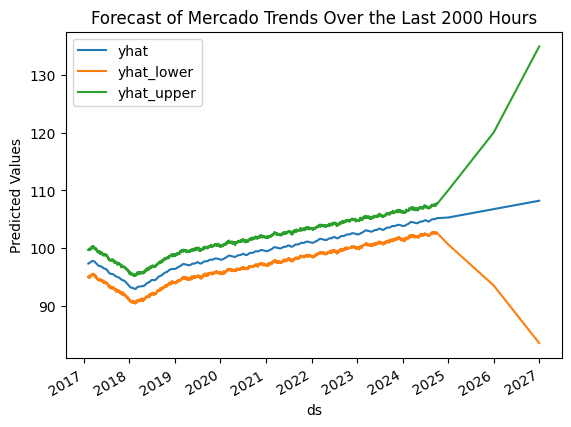

In [770]:
# From the forecast, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-2000:].plot()
plt.title('Forecast of Mercado Trends Over the Last 2000 Hours')
plt.xlabel('ds')
plt.ylabel('Predicted Values')
plt.legend(['yhat', 'yhat_lower', 'yhat_upper'])
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

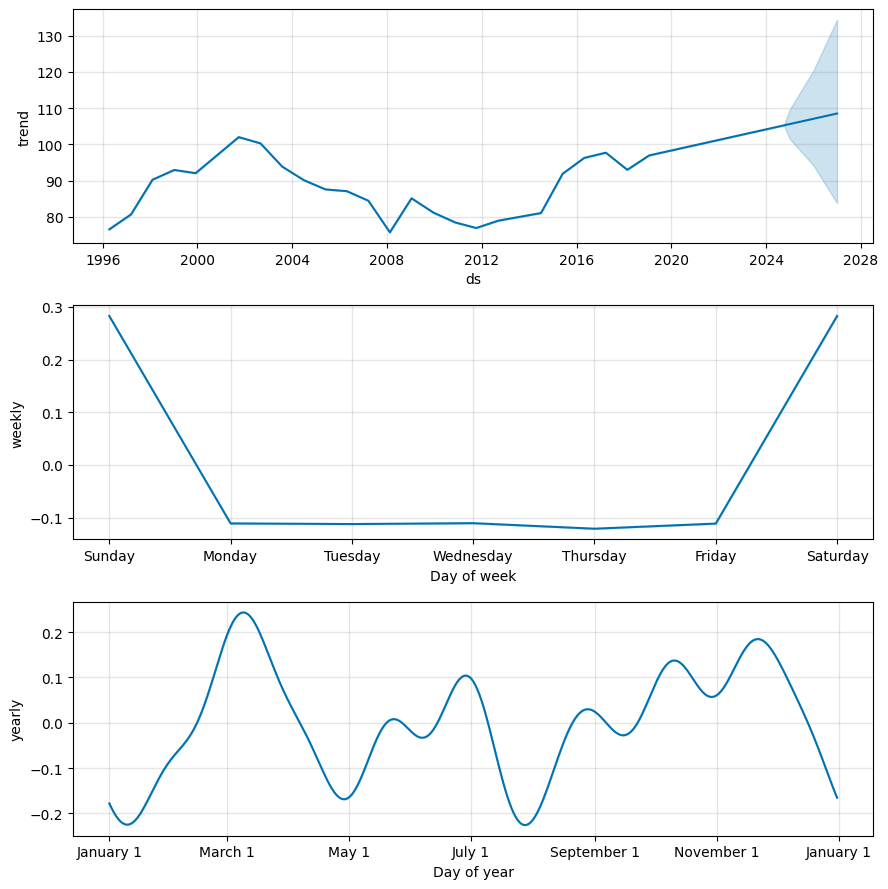

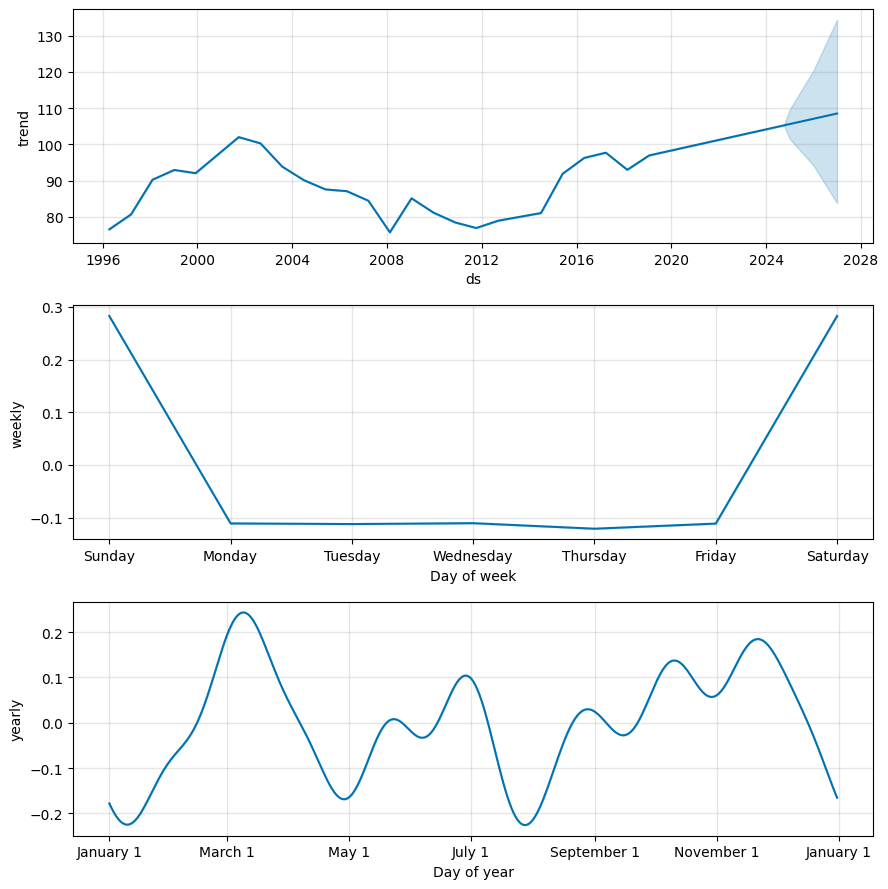

In [771]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast = forecast.reset_index()
forecast.head()

# Use the plot_components function to visualize the forecast results
# for the forecast_mercado_trends DataFrame
model.plot_components(forecast)